In [ ]:
import os
import keras
import cv2
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import np_utils


In [ ]:
# if you use colab
!unzip /content/handwrite__detect.zip

In [ ]:
def prepare_data(image_path):
  num_image = 0
  data_label = []
  images = []
  for root, dirs, files in os.walk(image_path):
    # print("root: ", root)
    # print("dirs: ", dirs)
    # print("files:" ,files)
    for file in files:
      num_image +=1
      # print("file: ", file)
      # print()
      image_path = os.path.join(root, file) # get image's path
      # img = Image.open(image_path)
      # img = np.array(img).reshape(1, 28, 28)
      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      # img = cv2.resize(img, (28,28))
      images.append(img)
      label = os.path.basename(os.path.normpath(root)) # get the basename of root(label)
      data_label.append(label) # append label
    # print("current_data_label", data_label) 
  images = np.array(images)
  print("image shape: ", images.shape)
  print("num of labels: ", len(data_label))
  return images, data_label 

In [ ]:
# load data
# prepare_data("/content/train_image")
x_train, y_train = prepare_data("/content/train_image")
x_test, y_test = prepare_data("/content/test_image")

image shape:  (2450, 28, 28)
num of labels:  2450
image shape:  (1700, 28, 28)
num of labels:  1700


In [ ]:
# show image
plt.figure(figsize=(5, 5))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis("off")

In [ ]:
# hyperparameters
batch_size = 128
num_classes = 10
epochs = 800

In [ ]:
# normalize images
x_train = x_train.reshape(2450, 28, 28, 1).astype('float32')
x_test = x_test.reshape(1700, 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes) # one hot encoding
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes) # one hot encoding

In [ ]:
# show data's shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2450, 28, 28, 1)
(2450, 10)
(1700, 28, 28, 1)
(1700, 10)


In [ ]:
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1))) # add Conv layer
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer improve accuracy significantly

model.add(Conv2D(32, (3, 3))) # add Conv layer
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3))) # add Conv layer
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2))) # pooling layer improve accuracy significantly

model.add(Flatten()) 

model.add(Dense(128)) # add fully connected layer
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

# output model summary
# model.summary()

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
       optimizer="adam",
       metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss', patience=10)

# start training 
hist = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_split = 0.1,
          )

train loss: 0.000494485255330801
train acc: 1.0
test loss: 0.10287109017372131
test acc: 0.9858823418617249


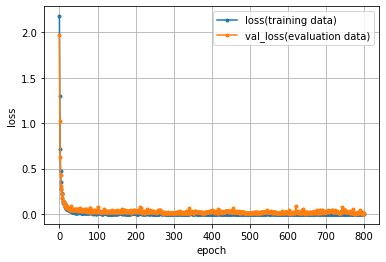

In [ ]:
# show training set accuracy
score = model.evaluate(x_train, y_train, verbose=0)
print('train loss:', score[0])
print('train acc:', score[1])

# show testing set accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

# plot loss figure
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Experiment notes
#### 100 epochs
- train loss: 0.0032357831951230764
- train acc: 0.9983673691749573
- test loss: 0.06635178625583649
- test acc: 0.9805882573127747

#### 200 epochs
- train loss: 0.001693558064289391
- train acc: 0.9995918273925781
- test loss: 0.07428544759750366
- test acc: 0.9835293889045715

#### 400 epochs
- train loss: 0.0025502017233520746
- train acc: 0.9995918273925781
- test loss: 0.08488412946462631
- test acc: 0.9835293889045715

#### 600 epochs
- train loss: 0.003987448755651712
- train acc: 0.9991836547851562
- test loss: 0.13777583837509155
- test acc: 0.9805882573127747

#### 800 epochs
- train loss: 0.000494485255330801
- train acc: 1.0
- test loss: 0.10287109017372131
- test acc: 0.9858823418617249

## References

https://staff.csie.ncu.edu.tw/jrjiang/alg2022/

https://www.w3schools.com/python/matplotlib_subplot.asp

https://docs.python.org/3/library/os.path.html#module-os.path

https://www.tutorialspoint.com/python/os_walk.htm

https://www.geeksforgeeks.org/convert-python-list-to-numpy-arrays/

https://stackoverflow.com/questions/3823752/.display-image-as-grayscale-using-matplotlib

https://keras.io/api/losses/

https://datascience.stackexchange.com/questions/44124/when-to-use-dense-conv1-2d-dropout-flatten-and-all-the-other-layers

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/

https://keras.io/api/layers/pooling_layers/max_pooling2d/

https://stackoverflow.com/questions/46516270/maxpooling-layer-causes-error-in-keras